# Calmcode coding challenge

In [38]:
import pandas as pd
import os
from configs import data_dir
import json
import PIL
import matplotlib.pyplot as plt
import numpy as np

## 1. Can you discover the hidden message found here?

Once you uncover the message, you can find the next challenge

In [24]:
# Load the message
message = pd.read_csv(os.path.join(data_dir, "message.csv"), sep=',')

In [25]:
message

,x,y
0,72,361
1,72,360
2,71,357
3,68,316
4,68,314
...,...,...
895,540,285
896,539,285
897,538,285
898,536,283


In [26]:
message.value_counts()

x    y  
465  371    5
271  281    5
72   360    5
148  289    4
442  326    4
           ..
190  323    1
     358    1
191  291    1
192  358    1
186  359    1
Name: count, Length: 795, dtype: int64

<Axes: xlabel='x', ylabel='y'>

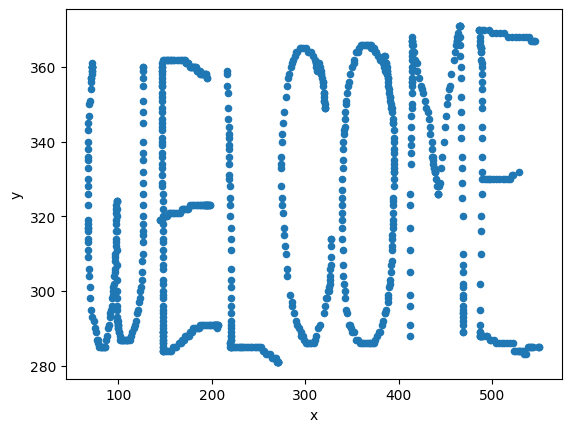

In [27]:
message.plot.scatter("x", "y")

## 2. You can hide a message in many ways, using many different data structures. We used a .csv file before, but can you find the hidden message in this json file too?

In [28]:
with open(os.path.join(data_dir, "message.json")) as data_file:    
    myjson = json.load(data_file)

In [29]:
df = pd.DataFrame(myjson)
df.head()

,i,j,value
0,0,1,_
1,0,10,_
2,0,19,_
3,0,21,_
4,0,29,_


In [30]:
decoded_data = []

for i in df['i'].unique():
    line = ''
    for j in range(max(df[df['i'] == i]['j'].tolist())):
        if j in df[df['i'] == i]['j'].tolist():
            line += df.loc[(df['i'] == i) & (df['j'] == j), 'value'].values[0]
        else:
            line += ' '
    decoded_data.append(line)
print(decoded_data)
decoded_data = '\n'.join(decoded_data)


print(decoded_data)


[' _        _        _ _       _     _     _     ', '| |      | |      | | |     | |   (_)   | |   | ', '| |_ ___ | |_ __ _| | |_   _| |__  _  __| | __| | ___ _ _', "| __/ _ \\| __/ _` | | | | | | '_ \\| |/ _` |/ _` |/ _ \\ '_ ", '| || (_) | || (_| | | | |_| | | | | | (_| | (_| |  __/ | | ', ' \\__\\___/ \\__\\__,_|_|_|\\__, |_| |_|_|\\__,_|\\__,_|\\___|_| |_', '                        __/ ', '                       |___']
 _        _        _ _       _     _     _     
| |      | |      | | |     | |   (_)   | |   | 
| |_ ___ | |_ __ _| | |_   _| |__  _  __| | __| | ___ _ _
| __/ _ \| __/ _` | | | | | | '_ \| |/ _` |/ _` |/ _ \ '_ 
| || (_) | || (_| | | | |_| | | | | | (_| | (_| |  __/ | | 
 \__\___/ \__\__,_|_|_|\__, |_| |_|_|\__,_|\__,_|\___|_| |_
                        __/ 
                       |___


## 3 You're currently looking at an HTML page. There's a puzzle on it, but it's a bit hidden. 

It's hidden around here.

- Found this "around here" in the HTML of the web page: Find the largest word (list of words)


In [31]:
with open(os.path.join(data_dir, "find_longest_word.txt")) as f:
    words = f.readlines()

In [32]:
words = words[0].split(',')
words[-1] = words[-1].split(" ")[0]

In [35]:
# Find largest word
def find_largest_word(words):
    largest_word = words[0]
    for word in words:
        if len(word) > len(largest_word):
            largest_word = word
    return largest_word

find_largest_word(words)

'multidisciplinary'

## 4. (Incomplete) You can also hide messages inside of images, like this one

In [39]:
ghost = PIL.Image.open(os.path.join(data_dir, "ghost.png"))

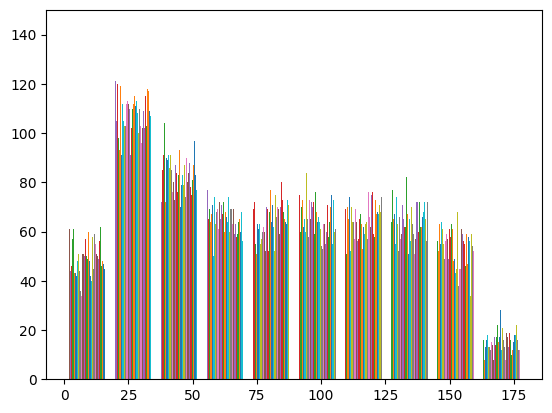

In [64]:
gray = ghost.convert("L")
arr = np.asarray(gray)
plt.hist(arr)
# plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

[[False False False ... False False False]
 [False  True False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


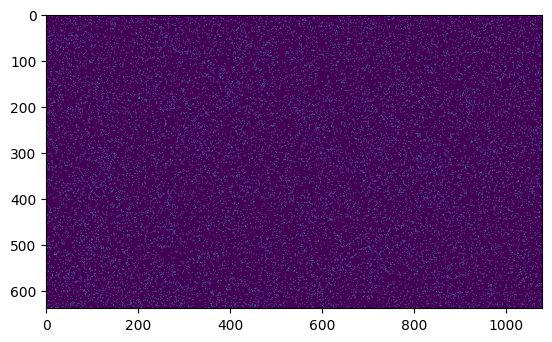

In [62]:
thresh = arr > 160
print(thresh)
plt.imshow(thresh, vmin=False, vmax=True)
plt.show()